In [1]:
%pip install pandas seaborn scikit-learn dtreeviz


[notice] A new release of pip available: 22.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Instalar Librerías

In [2]:
#Lbrerías numéricas
import numpy as np
#Manejar data en columnas y filas
import pandas as pd
#Para gráficos estadisticos
import seaborn as sns
#import matplotlib.pyplot as plt

Cargar el dataset

In [3]:
#Lee el archivo csv en un dataframe de pandas
vehicle_df=pd.read_csv('vehicle.csv')

In [4]:
#Muestra los primeros 5 registros del dataset
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
#Muestra los últimos 5 registros del dataset
vehicle_df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


Pre-procesamiento de datos

In [6]:
#Muestra un detalle de la data, y atributos
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
#Analiza la distribución del dataset
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


Revisar valores faltantes

In [8]:
#Revisa los valores faltantes del dataset
vehicle_df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [9]:
#Revisa cuantos son los valores faltantes del dataset, por columna
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

<AxesSubplot:>

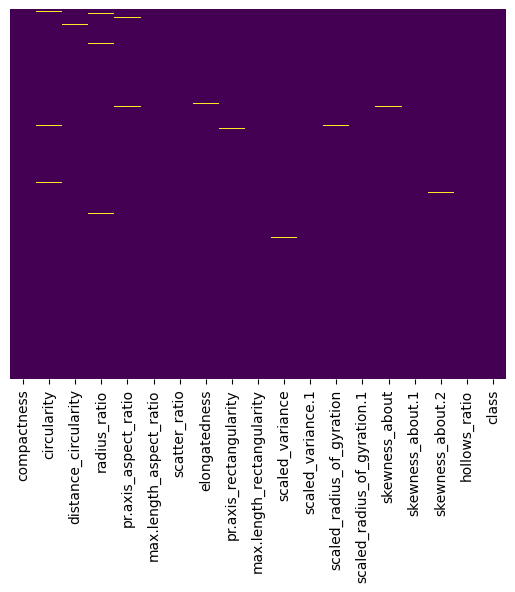

In [10]:
#Revisar los datos faltantes a través de un gráfico
sns.heatmap(vehicle_df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
#Reemplazar el espacio (' ') por una variable null utilizando numpy
vehicle_df = vehicle_df.replace(' ', np.nan)

Manejar los valores faltantes

In [12]:
#Reemplazar los espacios en blanco con la madiana
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)

In [13]:
#Volver a revisar si hay valores faltantes
vehicle_df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [14]:
#Volver a revisar la información del dataset
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

# Atributos

In [15]:
print('Class: \n', vehicle_df['class'].unique())

Class: 
 ['van' 'car' 'bus']


In [16]:
vehicles_counts = pd.DataFrame(vehicle_df['class'].value_counts()).reset_index()
vehicles_counts.columns = ['Labels', 'class']
vehicles_counts['Labels'] = ['Car', 'Bus', 'Van']
vehicles_counts

,Labels,class
0,Car,429
1,Bus,218
2,Van,199


<AxesSubplot:xlabel='class', ylabel='count'>

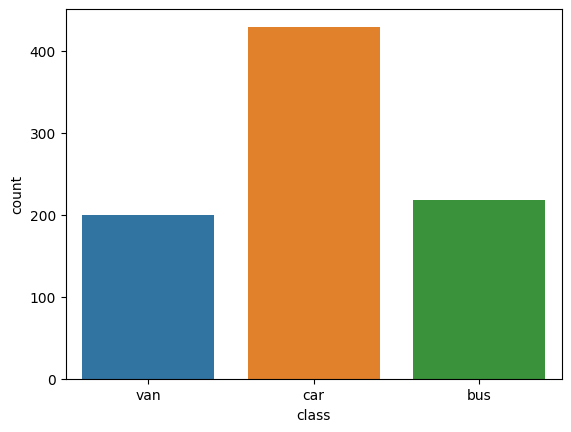

In [17]:
sns.countplot(x = vehicle_df['class'])

Análisis de los atributos

In [18]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# RANDOM FOREST

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_attr=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

In [21]:
X = vehicle_df[x_attr]
y = vehicle_df ['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (max_depth=5, random_state=42)

In [23]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [24]:
print("Score Train: ", clf.score(X_train, y_train),"\nScore Test: ", clf.score(X_test, y_test))

Score Train:  0.9734982332155477 
Score Test:  0.9607142857142857


In [25]:
vehicle_df.iloc[0]

compactness                       95
circularity                     48.0
distance_circularity            83.0
radius_ratio                   178.0
pr.axis_aspect_ratio            72.0
max.length_aspect_ratio           10
scatter_ratio                  162.0
elongatedness                   42.0
pr.axis_rectangularity          20.0
max.length_rectangularity        159
scaled_variance                176.0
scaled_variance.1              379.0
scaled_radius_of_gyration      184.0
scaled_radius_of_gyration.1     70.0
skewness_about                   6.0
skewness_about.1                16.0
skewness_about.2               187.0
hollows_ratio                    197
class                            van
Name: 0, dtype: object

In [26]:
car = vehicle_df[x_attr].head(1)

In [27]:
car

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197


In [28]:
prediction  = clf.predict(car)

In [29]:
estimator = clf.estimators_[1]
from sklearn.tree import export_graphviz
from subprocess import call

In [30]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_attr, class_names=["van","car","bus"],
                rounded = True, proportion = True, 
                precision = 2, filled = True)

In [33]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

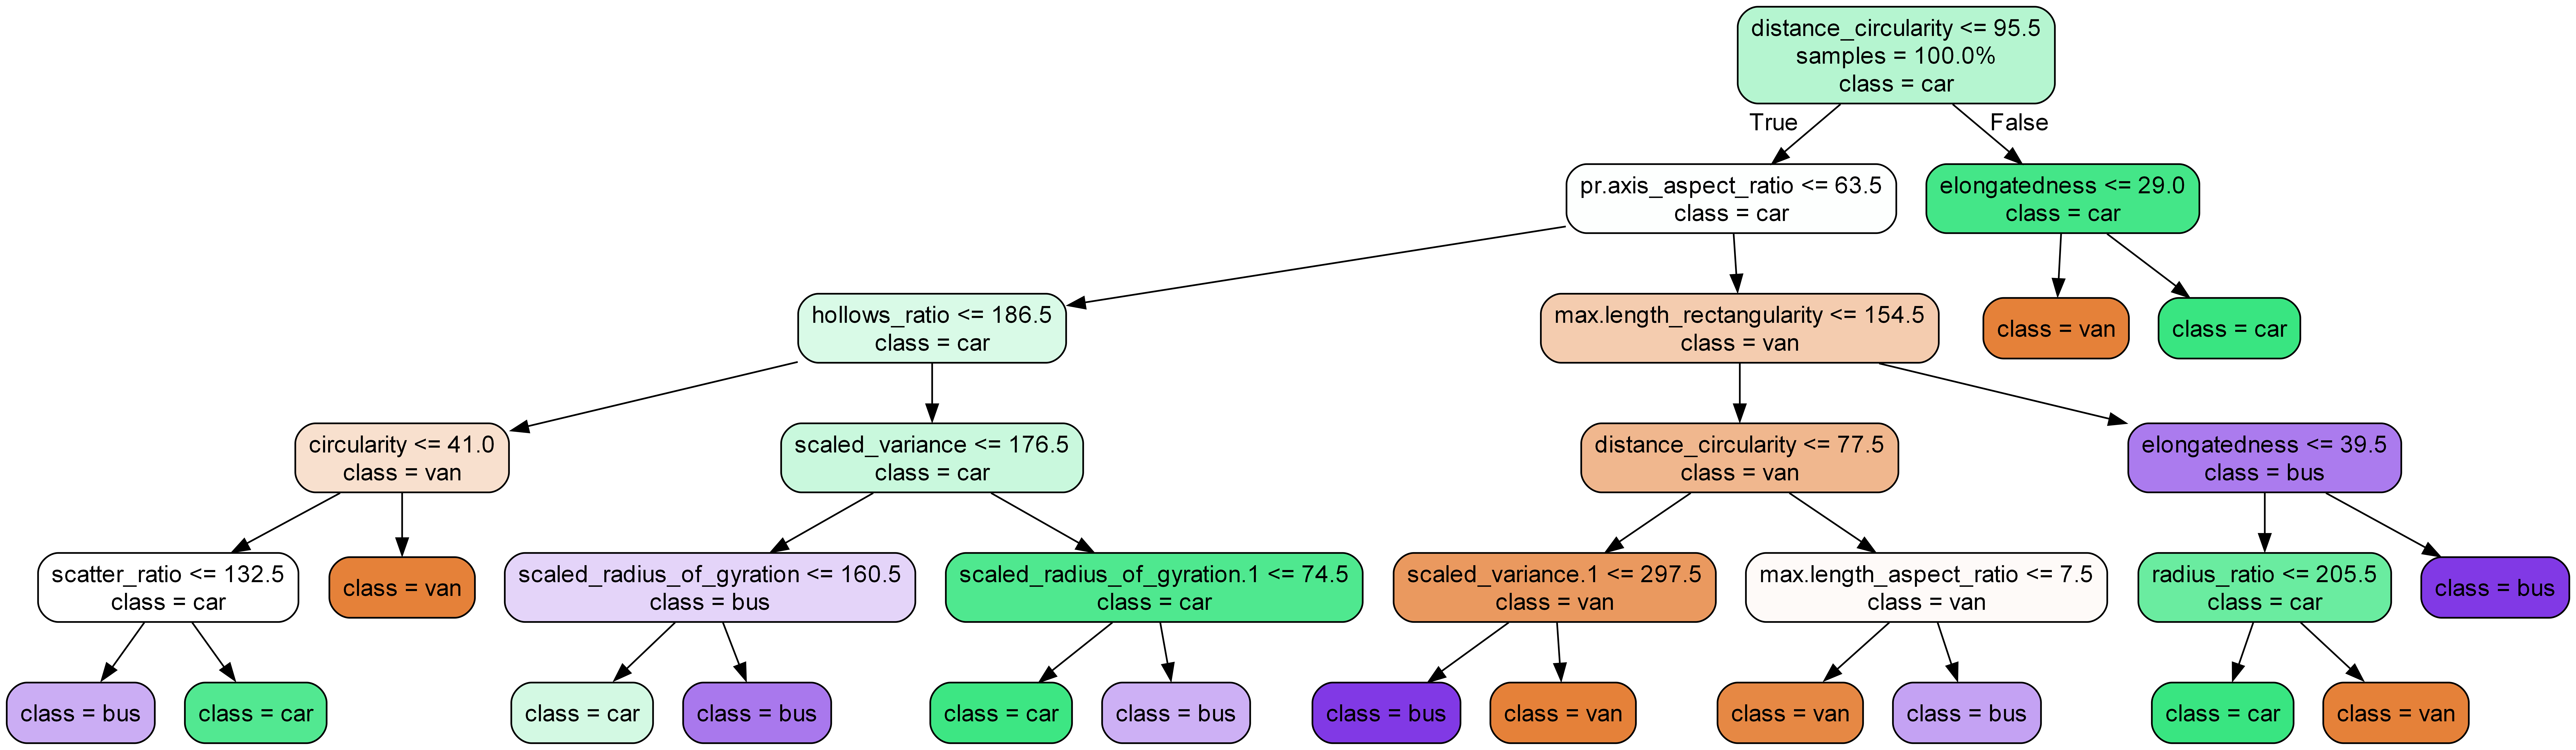

In [34]:
from IPython.display import Image
Image(filename = 'tree.png')